In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Distribution of the Sample Average

In [ ]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)
delay_mean = np.average(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))
delay_mean,delay_sd

In [ ]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [ ]:
def ten_thousand_sample_means(sample_size):
    """Use the bootstrap to approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)

In [ ]:
united.num_rows

In [ ]:
# How many possible sample means are there?
united.num_rows ** 400

## CLT: Center

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

## CLT: Spread

In [ ]:
sample_means_900 = ten_thousand_sample_means(900)

In [ ]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

In [ ]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

## Quantifying the Effect of Sample Size

In [ ]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("\nPopulation SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Ratio:", delay_sd / np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

In [ ]:
plot_and_summarize_sample_means(100)

In [ ]:
plot_and_summarize_sample_means(400)

In [ ]:
plot_and_summarize_sample_means(900)

## Another way to look at it

In [25]:
# Warning!!! This cell takes a long time to run! Don't run in class
sample_sizes = np.arange(100,950,50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds,np.std(sample_means)) 

In [28]:
sd_table = Table().with_columns(
'Sample size',sample_sizes,
'SD of simulated sample means', sample_mean_sds,
'Pop SD /sqrt(sample size)',delay_sd/np.sqrt(sample_sizes))
sd_table

Sample size,SD of simulated sample means,Pop SD /sqrt(sample size)
100,3.95979,3.94802
150,3.22945,3.22354
200,2.82379,2.79167
250,2.48672,2.49695
300,2.28381,2.27939
350,2.05629,2.11031
400,1.98878,1.97401
450,1.86054,1.86111
500,1.75384,1.76561
550,1.68496,1.68344


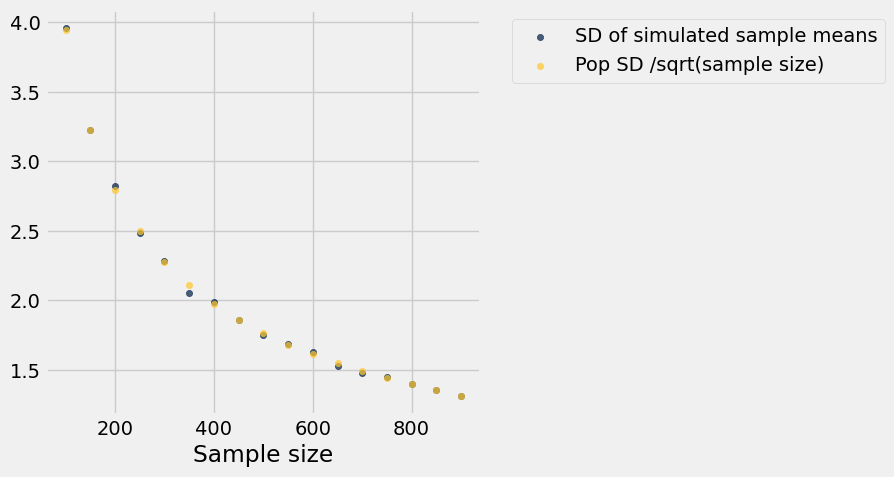

In [29]:
sd_table.scatter('Sample size')

In [ ]:
39.48 / np.sqrt(100)

In [ ]:
39.48 / np.sqrt(400)

In [ ]:
39.48 / np.sqrt(900)